In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy import stats

# Question
A machine is producing perfume bottles with the long term average of 150ml and the standard deviation of 2ml.
Four bottles were picked and the average volume was found to be 149ml.
Has the average volume min of 150ml? Test with 95% confidence level.

# Solution
- Null Hypothesis: Mean volume >= 150ml
- Alternate Hypothesis: Mean volume < 150ml
- Alpha = 1 - 0.95 = 0.05
- **Left Tail Z test**

- Z calculated = (Observed mean - population mean) / standard error
- z = (x — μ) / (σ / √n)

**p-value approach**

In [3]:
Z_cal = (149-150)/(2/np.sqrt(4))
Z_cal

-1.0

In [4]:
#left tail --- > stats.norm.cdf(z_cal)         --> Cumulative distribution function. (area to the left of x)
stats.norm.cdf(-1.0)

0.15865525393145707

**Inferences:**
- P > alpha
- P High -- Null Fly
- Do not Reject H0.

**critical value approach**

In [5]:
stats.norm.ppf(0.05)

-1.6448536269514729

**Inferences:**
- test statistic > critical value
- Do not Reject H0.

# Question
The mean response times for a random sample of 30 Pizza Deliveries is 32 minutes. The population standard deviation is believed to be 10 minutes. The  pizza  delivery  services  director  wants  to  perform  a hypothesis  test,  with  a  =0.05  level  of  significance,  to determine whether the service goal of 30 minutes or less is  being achieved. 


# Solution
- Null Hypothesis: Mean time <= 30
- Alternate Hypothesis: Mean time > 30 
- Alpha = 0.05
- **Right Tail Z test -- Right Tail Rejection**
- Z calculated = (Observed mean - population mean) / standard error
- z = (x — μ) / (σ / √n)

In [6]:
Z_cal = (32-30)/(10/np.sqrt(30))
print(Z_cal)

1.0954451150103321


In [7]:
#right tail  --- > 1-norm.cdf(z_cal)     --> Cumulative distribution function. (area to the left of x)
1- stats.norm.cdf(1.09) 

0.1378565720320355

In [8]:
#right tail --> norm.sf(z_cal)           --> Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
stats.norm.sf(1.09)

0.1378565720320355

**Inferences:**

- P high --Null Fly
- Do not reject H0.
- There are not sufficient statistical evidence to infer that Pizza delivery services is not meeting the response goal of 30 minutes.

# Question

Assume that a sample of 30 milk carton provides a sample mean of 505 ml.  • The population standard deviation is believed to be 10 ml. • Perform a hypothesis test, at the 0.03 level of significance, population mean 500 ml and to help determine whether the filling process should continue operating or be stopped and corrected. 

# Solution
- Null Hypothesis: Mean = 500ml
- Alternate Hypothesis: Mean != 500ml            
- **Two Tail Z-Test**
- Alpha = 0.03
- Z calculated = (Observed mean - population mean) / standard error
- z = (x — μ) / (σ / √n)

In [9]:
Z_cal = (505-500)/(10/np.sqrt(30))
print(Z_cal)

2.7386127875258306


In [10]:
#Two tail   ---> (norm.sf(z_cal))*2

pvalue = 2*stats.norm.sf(Z_cal)
pvalue

0.00616989932054416

**Inferences:**

- P low -- Null go
- Reject H0.
- There is no sufficient statistical evidence to infer that the null hypothesis is true (i.e. the mean filling  quantity is not 500 ml) 

# 1 Sample Z test (Fabric Data)

In [11]:
fabric=pd.read_excel("Fabric data.xlsx")
fabric.head()

,Fabric_length
0,151.2
1,160.3
2,147.5
3,149.2
4,159.2


### Check for Normality

1. Histogram & Density Curve
2. Skewness value
3. Shapiro Test

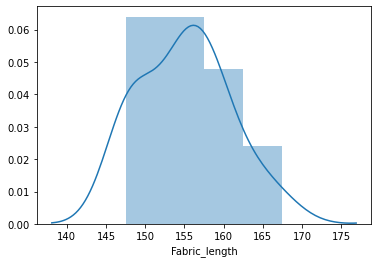

In [12]:
import seaborn as sns
sns.distplot(fabric['Fabric_length'])

In [13]:
fabric['Fabric_length'].skew()

0.29650632012590666

In [14]:
# Normality test - ShapiroTest
#Ho: Data are normal
#Ha: Data are not normal

stats.shapiro(fabric['Fabric_length'])

ShapiroResult(statistic=0.9397523999214172, pvalue=0.14609353244304657)

In [15]:
from statsmodels.stats import weightstats

In [16]:
weightstats.ztest(fabric.Fabric_length, value=150, alternative='smaller')

(4.488987748287781, 0.9999964218793723)

# 1 sample T test 

**Bolt Diameter**

In [17]:
bolt = pd.read_excel("Bolt diameter.xlsx")
bolt.head()

,Diameter
0,11.27
1,12.06
2,12.15
3,9.89
4,10.82


SyntaxError: invalid syntax (<ipython-input-23-37794bd1969b>, line 1)

In [18]:
# Normality test - ShapiroTest
#Ho: Data are normal
#Ha: Data are not normal
    
stats.shapiro(bolt['Diameter'])

ShapiroResult(statistic=0.963375449180603, pvalue=0.613252580165863)

In [19]:
#Ho: Mean  = 10
#Ha: Mean != 10  

stats.ttest_1samp(bolt.Diameter, 10)

Ttest_1sampResult(statistic=4.1146847709314756, pvalue=0.0005896412896356807)

# 1 Sample Sign Test

**Scores**

In [ ]:
data=pd.read_excel("Marks-1sample sign test.xlsx")
data.head()

In [ ]:
# Normality test - ShapiroTest
#Ho: Data are normal
#Ha: Data are not normal

stats.shapiro(data.Marks)

In [ ]:
data['Marks'].skew()

In [ ]:
import statsmodels.stats.descriptivestats as sd

In [ ]:
sd.sign_test(data.Marks,82)

# 2 Sample Z test

In [ ]:
df = pd.read_csv('Two Machines.csv')
df.head()

In [ ]:
m1 = df[df['Machine'] == 'Machine 1']['Volume']
m2 = df[df['Machine'] == 'Machine 2']['Volume']

In [ ]:
weightstats.ztest(m1, m2)

In [ ]:
stats.ttest_ind(m1, m2, equal_var=True)

# 2 Sample t test

**Creditcard Promotion**

In [ ]:
promotion=pd.read_excel("Promotion.xlsx")
promotion.head()

In [ ]:
promotion.columns

In [ ]:
#reaname column names
promotion.columns = "InterestRateWaiver","StandardPromotion"

**Normality test**  ----> **Shapiro Test**
- Ho: Data are normal
- Ha: Data are not normal

In [ ]:
print(stats.shapiro(promotion.InterestRateWaiver))
print(stats.shapiro(promotion.StandardPromotion))

### Variance test
- Ho: Variances are equal
- Ha: Variances are not equal

In [ ]:
######## Variance test #########
stats.levene(promotion.InterestRateWaiver, promotion.StandardPromotion)

- Ho: Avg of purchases made by FIW < = Avg purchases made by SC =>default/ current/ no action
- Ha: Avg of purchases made by FIW > Avg purchases made by SC =>take action 

In [ ]:
stats.ttest_ind(promotion.InterestRateWaiver,promotion.StandardPromotion,equal_var=True)

In [ ]:
stats.ttest_ind(promotion.InterestRateWaiver,promotion.StandardPromotion,equal_var=False)

# Paired T Test

In [ ]:
bp_before = [120, 122, 143, 100, 109]
bp_after = [122, 120, 141, 109, 109]

In [ ]:
stats.ttest_rel(bp_before, bp_after)

# Mann-Whitney test

In [ ]:
data=pd.read_excel("Mann_whitney.xlsx")
data.head()

In [ ]:
data.columns="Without_additive","With_additive"

In [ ]:
#############Normality test###############
print(stats.shapiro(data.Without_additive))
print(stats.shapiro(data.With_additive))

In [ ]:
stats.mannwhitneyu(data.Without_additive, data.With_additive)

# One - Way Anova

In [ ]:
cof=pd.read_excel("ContractRenewal_Data(unstacked).xlsx")
cof.head()

In [ ]:
cof.columns

In [ ]:
#reanme
cof.columns="SupplierA","SupplierB","SupplierC"

In [ ]:
##########Normality Test ############
print(stats.shapiro(cof.SupplierA)) 
print(stats.shapiro(cof.SupplierB))
print(stats.shapiro(cof.SupplierC))

In [ ]:
# All 3 suppliers are being checked for variances
stats.levene(cof.SupplierA,cof.SupplierB,cof.SupplierC)

In [ ]:
############## Variance test #########
print(stats.levene(cof.SupplierA, cof.SupplierB))
print(stats.levene(cof.SupplierB, cof.SupplierC))
print(stats.levene(cof.SupplierC, cof.SupplierA))

In [ ]:
stats.f_oneway(cof.SupplierA ,cof.SupplierB ,cof.SupplierC)

- P High Null Fly
- All the 3 suppliers have equal mean transaction time

# One Proportion Test

#football problem

- H0:Coach not to be fired (No action) -No diiference
- H1:Coach to be fired (action) 

In [24]:
stats.binom_test(482, 2000, 0.25)

0.36615115821892597

In [25]:
df = pd.read_csv('Smokers.csv')
df.head()

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No


In [29]:
df

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No
...,...,...
95,Person 96,No
96,Person 97,No
97,Person 98,No
98,Person 99,No


In [26]:
df.shape

(100, 2)

In [27]:
# If you want yes/no in tabular form, use group_by
smk = df.groupby(by='Smokers').count()
smk

,Name
Smokers,
No,86
Yes,14


In [28]:
stats.binom_test(14, 100, 0.25)

0.010602863153580892

# 2-Proportion Test 

In [30]:
df=pd.read_excel("JohnyTalkers.xlsx")
df.head()

,Person,Drinks
0,Adults,Did Not Purchase
1,Adults,Did Not Purchase
2,Adults,Did Not Purchase
3,Adults,Did Not Purchase
4,Adults,Did Not Purchase


In [31]:
#we do the cross table and see How many adults or children are purchasing
tab1 = df.Person.value_counts()
print(tab1)

Children    740
Adults      480
Name: Person, dtype: int64


In [32]:
tab2 = df.Drinks.value_counts()
tab2

Did Not Purchase    1010
Purchased            210
Name: Drinks, dtype: int64

In [33]:
# crosstable table
pd.crosstab(df.Person,df.Drinks,margins=True)

Drinks,Did Not Purchase,Purchased,All
Person,,,
Adults,422,58,480
Children,588,152,740
All,1010,210,1220


In [34]:
#importing packages to do 2 proportion test
from statsmodels.stats.proportion import proportions_ztest

In [35]:
count = np.array([58, 152]) #How many adults and childeren are purchasing
nobs = np.array([480, 740]) #Total number of adults and childern are there 
stat, pval = proportions_ztest(count, nobs,alternative='two-sided') 
print(stat,pval)

#Alternative The alternative hypothesis can be either two-sided or one of the one- sided tests
#smaller means that the alternative hypothesis is prop < value
#larger means prop > value.

# two. sided -> means checking for equal proportions of Adults and children under purchased
# p-value = 6.261e-05 < 0.05 accept alternate hypothesis i.e.
# Unequal proportions 

-3.8227247718795447 0.00013198507287726183


In [ ]:
stat, pval = proportions_ztest(count, nobs,alternative='larger')
print(pval)
# H0 -> Proportions of Adults >= Proportions of Children
# H1 -> Proportions of Children > Proportions of Adults
 
# so proportion of Children > proportion of adults 
# Do not launch the drink

# Chi-Square Test

- H0 : No difference in proportion between countries
- H1 : difference in proportion between countries

In [36]:
Bahaman=pd.read_excel("Bahaman.xlsx")
Bahaman

,Defective,Country
0,0,India
1,0,India
2,0,India
3,0,India
4,1,India
...,...,...
795,0,Bangladesh
796,0,Bangladesh
797,1,Bangladesh
798,0,Bangladesh


In [37]:
count=pd.crosstab(Bahaman["Defective"],Bahaman["Country"])
count

Country,Bangladesh,China,India,Srilanka
Defective,,,,
0,183,179,175,178
1,17,21,25,22


In [38]:
stats.chi2_contingency(count)

(1.7243932538050184,
 0.6315243037546223,
 3,
 array([[178.75, 178.75, 178.75, 178.75],
        [ 21.25,  21.25,  21.25,  21.25]]))

In [39]:
Chisquares_results=stats.chi2_contingency(count)
print('p-value:',Chisquares_results[1])

p-value: 0.6315243037546223
